# Importing Libraries

In [1]:
import torch
from torch import nn

import numpy as np

from sklearn import datasets

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters

In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in Stages


## Code Implementation

In [8]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts,
                             random_state=123,
                             noise=0.1,
                             factor=0.2)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(500, 1)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of data circles with noise and different diameters")

statements = [
    """
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts,
                             random_state=123,
                             noise=0.1,
                             factor=0.2)
X_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape(500, 1)
"""
]
tabulation.statement_generator(statements)

variables = ["X", "y"]
values = [str(reprlib_rules.repr(X)), str(reprlib_rules.repr(y))]
tabulation.variable_generator(variables, values)

Creation of data circles with noise and different diameters

    +------------------------------------------------+
    | Statement                                      |
    +------------------------------------------------+
    | n_pts = 500                                    |
    | X, y = datasets.make_circles(n_samples=n_pts,  |
    |                              random_state=123, |
    |                              noise=0.1,        |
    |                              factor=0.2)       |
    | X_data = torch.Tensor(X)                       |
    | y_data = torch.Tensor(y).reshape(500, 1)       |
    +------------------------------------------------+
    +----------+--------------------------------------------------+
    | Variable | Value                                            |
    +----------+--------------------------------------------------+
    | X        | array([[ 6.98553633e-01, -3.78289607e-01],       |
    |          |        [-2.48422424e-01,  1.91071221e-01],   

In [9]:
def scatter_plot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to visualize data as scatter points")

definitions = [
    """
def scatter_plot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
"""
]
tabulation.definition_generator(definitions)

Function definition to visualize data as scatter points

    +---------------------------------------------+
    | Definition                                  |
    +---------------------------------------------+
    | def scatter_plot():                         |
    |     plt.scatter(X[y == 0, 0], X[y == 0, 1], |
    |     color=colors.pop(0))                    |
    |     plt.scatter(X[y == 1, 0], X[y == 1, 1], |
    |     color=colors.pop(0))                    |
    +---------------------------------------------+


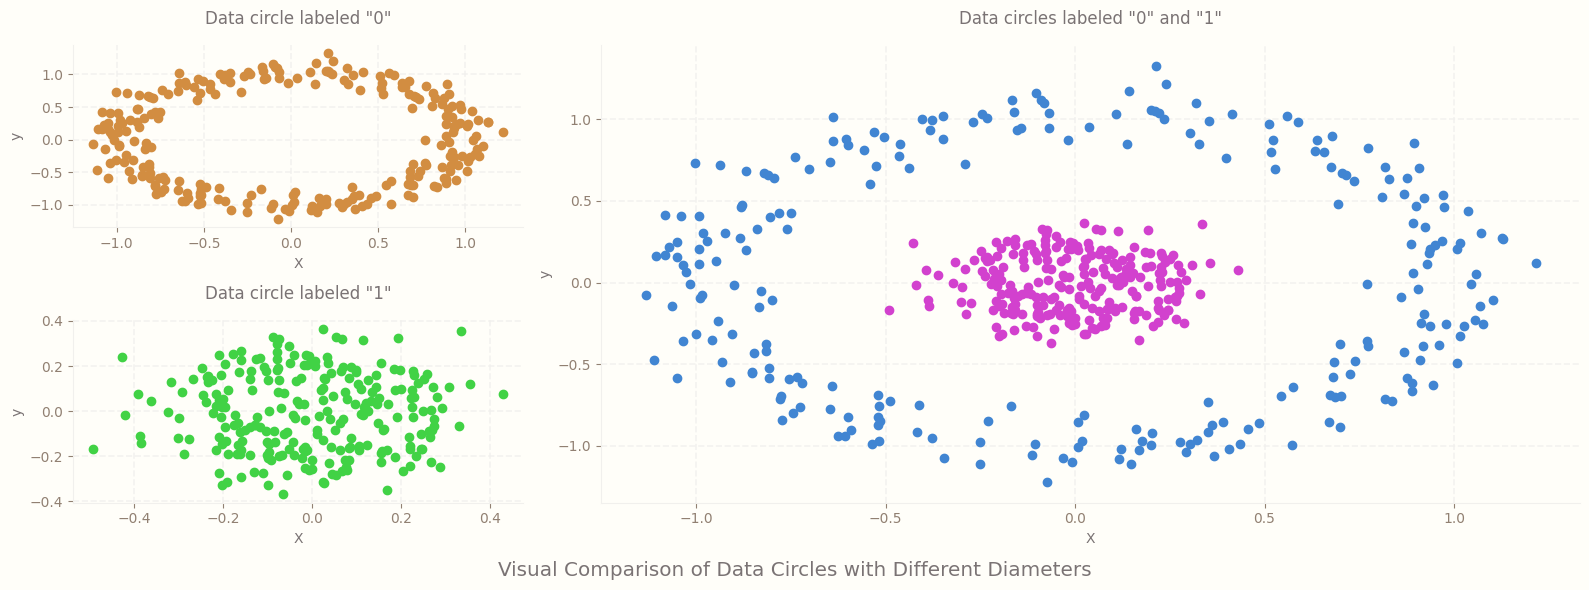

In [10]:
colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 3 * 2)

fig, axs = plt.subplots(nrows=2, ncols=3)
gs = axs[0, 1].get_gridspec()
for ax in axs[0, 1:]:
    ax.remove()
for ax in axs[1, 1:]:
    ax.remove()
axbig = fig.add_subplot(gs[:, 1:])

axs[0, 0].scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axs[0, 0].set_title("Data circle labeled \"0\"", loc="center", pad=15)

axs[1, 0].scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axs[1, 0].set_title("Data circle labeled \"1\"", loc="center", pad=15)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")

axbig.scatter(X[y == 0, 0], X[y == 0, 1], color=colors.pop(0))
axbig.scatter(X[y == 1, 0], X[y == 1, 1], color=colors.pop(0))
axbig.set_title("Data circles labeled \"0\" and \"1\"", loc="center", pad=15)

axbig.set(xlabel="X", ylabel="y")

fig.suptitle("Visual Comparison of Data Circles with Different Diameters",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [11]:
class Model(nn.Module):

    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0


torch.manual_seed(2)
model = Model(2, 4, 1)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of custom module class")

definitions = [
    """
class Model(nn.Module):

    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
"""
]
tabulation.definition_generator(definitions)

statements = ["""
torch.manual_seed(2)
model = Model(2, 4, 1)
"""]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = ["model.parameters()", "list(model.parameters())"]
results = [str(model.parameters()), str(list(model.parameters()))]
tabulation.expression_generator(expressions, results)

Initialization of custom module class

    +------------------------------------------------------+
    | Definition                                           |
    +------------------------------------------------------+
    | class Model(nn.Module):                              |
    |                                                      |
    |     def __init__(self, input_size, H1, output_size): |
    |         super().__init__()                           |
    |         self.linear = nn.Linear(input_size, H1)      |
    |         self.linear2 = nn.Linear(H1, output_size)    |
    |                                                      |
    |     def forward(self, x):                            |
    |         x = torch.sigmoid(self.linear(x))            |
    |         x = torch.sigmoid(self.linear2(x))           |
    |         return x                                     |
    |                                                      |
    |     def predict(self, x):               

In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Specific configuration settings for the training process")

statements = [
    """
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Specific configuration settings for the training process

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | criterion = nn.BCELoss()                                  |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.01) |
    +-----------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | BCELoss()                 |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach: None     

In [13]:
epochs = 1000
losses = []

dataframe = DataFrame_Generator("epoch", "loss")

for i in range(epochs):
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    dataframe.updater(i + 1, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tabulation = Form_Generator()
tabulation.heading_printer("Model training for a specific number of epochs")

statements = """
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
"""
statements = [statements]
tabulation.statement_generator(statements)

variables = ["epochs", "losses"]
values = [str(epochs), str(reprlib_rules.repr(losses))]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Model training for a specific number of epochs

    +--------------------------------------+
    | Statement                            |
    +--------------------------------------+
    | epochs = 1000                        |
    | losses = []                          |
    |                                      |
    | for i in range(epochs):              |
    |     y_pred = model.forward(X_data)   |
    |     loss = criterion(y_pred, y_data) |
    |     losses.append(loss.item())       |
    |     optimizer.zero_grad()            |
    |     loss.backward()                  |
    |     optimizer.step()                 |
    +--------------------------------------+
    +----------+-----------------------------------------------+
    | Variable | Value                                         |
    +----------+-----------------------------------------------+
    | epochs   | 1000                                          |
    | losses   | [0.7148520350456238, 0.7117707133293152,     

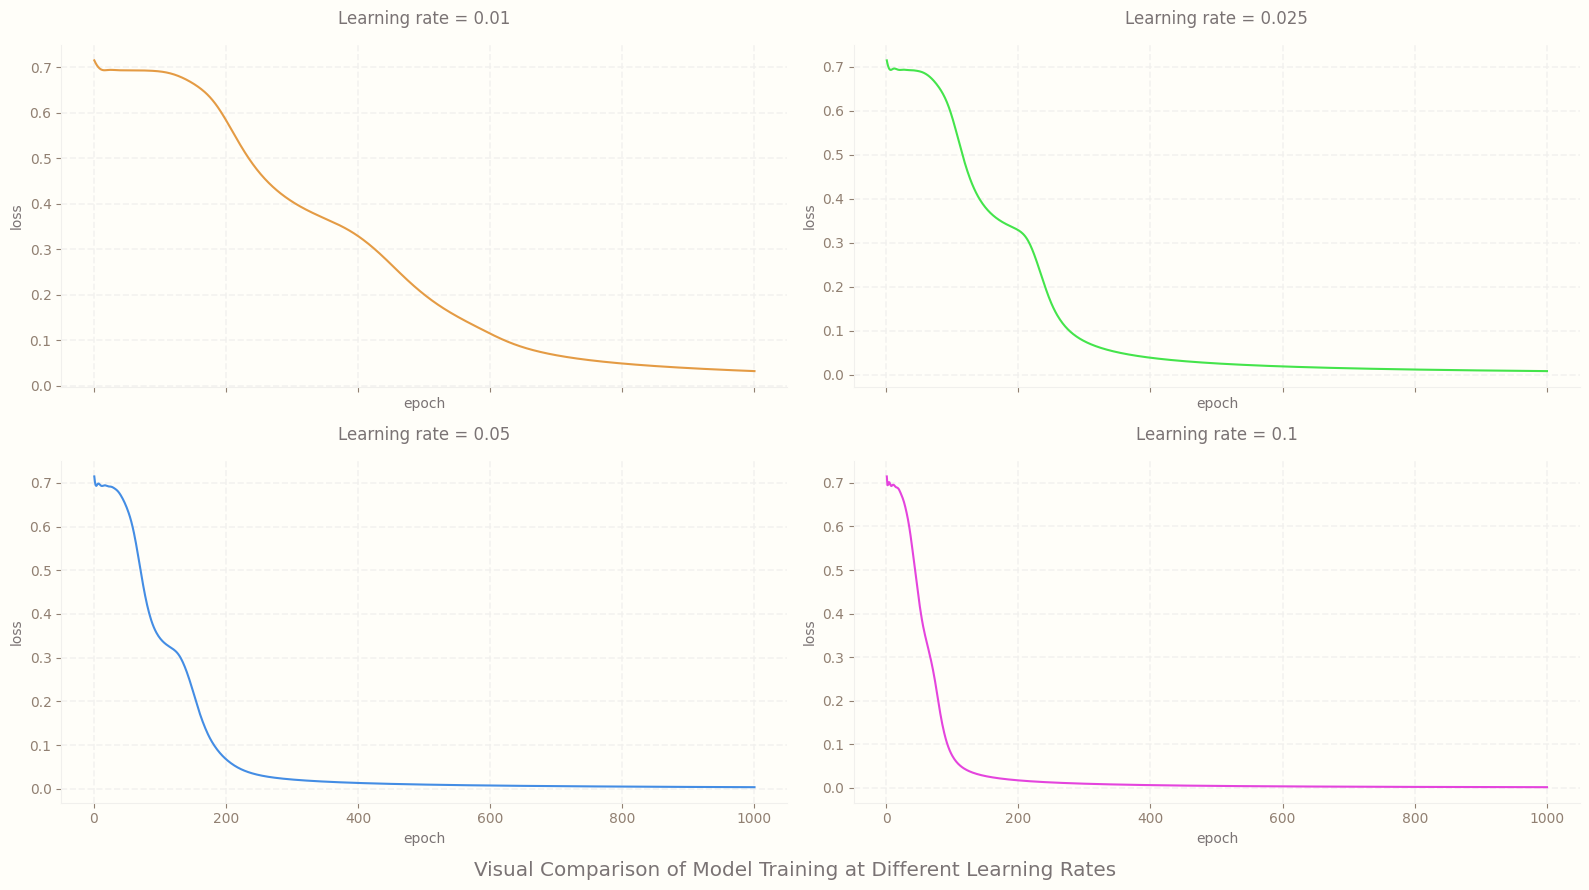

In [14]:
def loss_value_calculator(epochs,
                          lr,
                          criterion=nn.BCELoss(),
                          optimizer_type=torch.optim.Adam,
                          **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr)
    epochs = epochs
    losses = []
    for i in range(epochs):
        y_pred = model.forward(X_data)
        loss = criterion(y_pred, y_data)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses


colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

lr_list = [0.01, 0.025, 0.05, 0.1]

torch.manual_seed(2)
model = Model(2, 4, 1)
losses = loss_value_calculator(epochs=epochs, lr=lr_list[0])
axs[0, 0].plot(range(1, epochs + 1), losses, c=colors.pop(0))

torch.manual_seed(2)
model = Model(2, 4, 1)
losses = loss_value_calculator(epochs=epochs, lr=lr_list[1])
axs[0, 1].plot(range(1, epochs + 1), losses, c=colors.pop(0))

torch.manual_seed(2)
model = Model(2, 4, 1)
losses = loss_value_calculator(epochs=epochs, lr=lr_list[2])
axs[1, 0].plot(range(1, epochs + 1), losses, c=colors.pop(0))

torch.manual_seed(2)
model = Model(2, 4, 1)
losses = loss_value_calculator(epochs=epochs, lr=lr_list[3])
axs[1, 1].plot(range(1, epochs + 1), losses, c=colors.pop(0))

for ax, lr in zip(axs.flat, lr_list):
    ax.set(xlabel="epoch", ylabel="loss")
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Training at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

## Testing Model

In [15]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0] + 0.25))
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1] + 0.25))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z, alpha=.5, cmap=cmap)


tabulation = Form_Generator()
tabulation.heading_printer("Definition of visualization function")

definitions = [
    """
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0] + 0.25))
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1] + 0.25))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z, alpha=.5, cmap=cmap)
"""
]
tabulation.definition_generator(definitions)

Definition of visualization function

    +-------------------------------------------------------------+
    | Definition                                                  |
    +-------------------------------------------------------------+
    | def plot_decision_boundary(X, y):                           |
    |     x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0] + |
    |     0.25))                                                  |
    |     y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1] + |
    |     0.25))                                                  |
    |     xx, yy = np.meshgrid(x_span, y_span)                    |
    |     grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])      |
    |     pred_func = model.forward(grid)                         |
    |     z = pred_func.view(xx.shape).detach().numpy()           |
    |     plt.contourf(xx, yy, z, alpha=.5, cmap=cmap)            |
    +-------------------------------------------------------------+


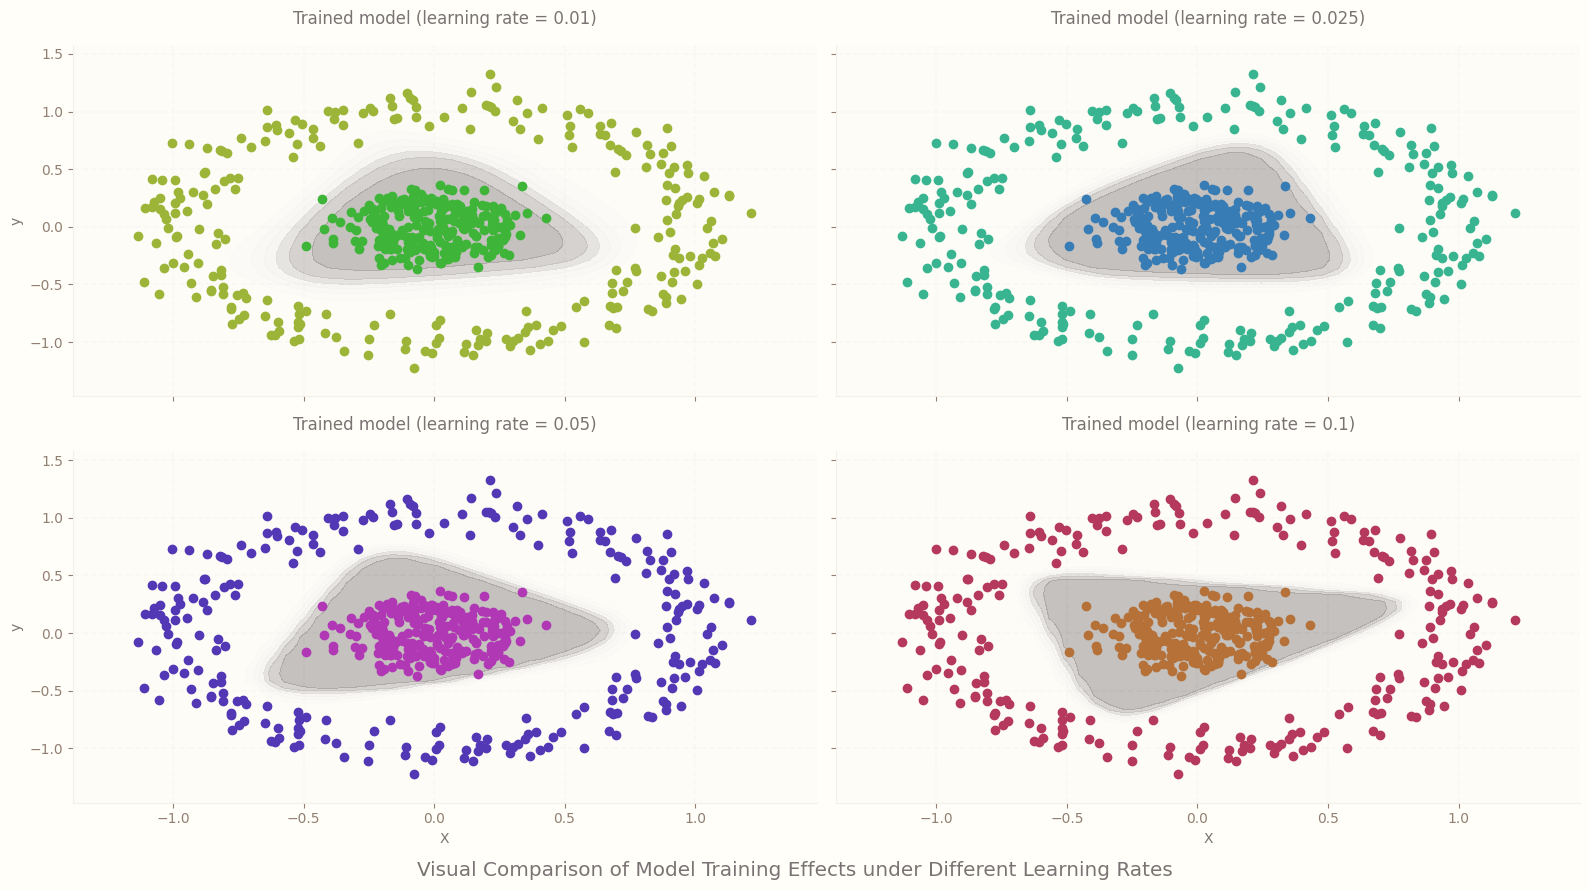

In [16]:
def backpropagation_iterations(epochs,
                               lr,
                               criterion=nn.BCELoss(),
                               optimizer_type=torch.optim.Adam,
                               **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr)
    epochs = epochs
    for i in range(epochs):
        y_pred = model.forward(X_data)
        loss = criterion(y_pred, y_data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


colors = [
    plt.rcParams["axes.facecolor"], plt.rcParams["axes.edgecolor"],
    plt.rcParams["axes.labelcolor"]
]
cmap = LinearSegmentedColormap.from_list("", colors)

colors = calm_color_generator(8)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharey=True)

plt.subplot(2, 2, 1)
torch.manual_seed(2)
model = Model(2, 4, 1)
backpropagation_iterations(epochs=epochs, lr=lr_list[0])
plot_decision_boundary(X, y)
scatter_plot()

plt.subplot(2, 2, 2)
torch.manual_seed(2)
model = Model(2, 4, 1)
backpropagation_iterations(epochs=epochs, lr=lr_list[1])
plot_decision_boundary(X, y)
scatter_plot()

plt.subplot(2, 2, 3)
torch.manual_seed(2)
model = Model(2, 4, 1)
backpropagation_iterations(epochs=epochs, lr=lr_list[2])
plot_decision_boundary(X, y)
scatter_plot()

plt.subplot(2, 2, 4)
torch.manual_seed(2)
model = Model(2, 4, 1)
backpropagation_iterations(epochs=epochs, lr=lr_list[3])
plot_decision_boundary(X, y)
scatter_plot()

for ax, lr in zip(axs.flat, lr_list):
    ax.set(xlabel="X", ylabel="y")
    ax.set_title("Trained model (learning rate = {})".format(lr),
                 loc="center",
                 pad=15)
    ax.label_outer()

fig.suptitle(
    "Visual Comparison of Model Training Effects under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()

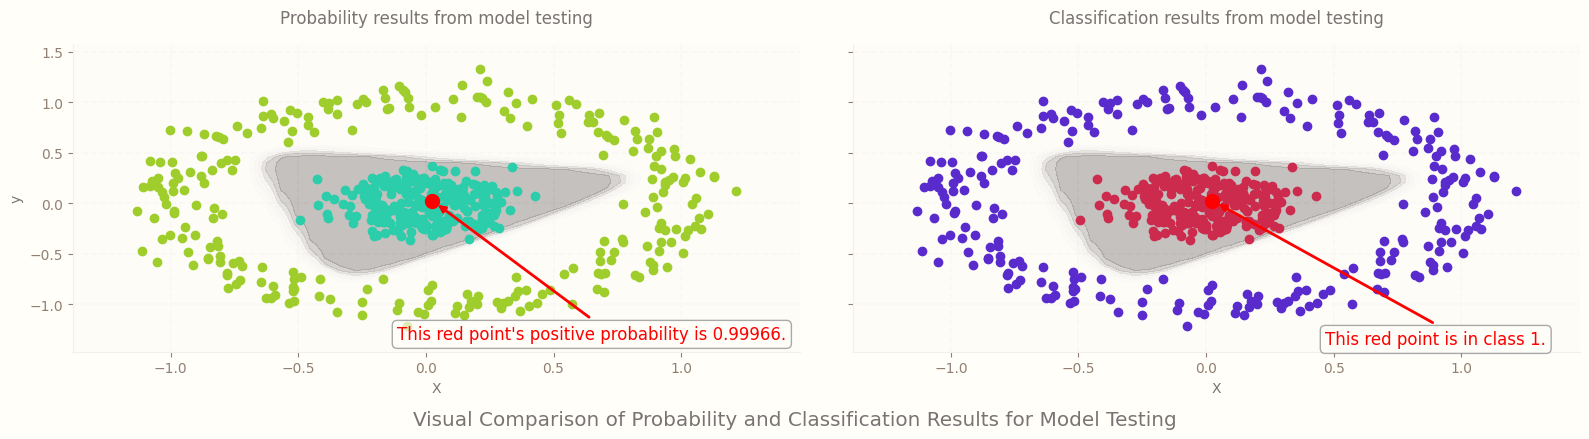

In [17]:
colors = calm_color_generator(4)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2, sharey=True)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

point_X = 0.025
point_y = 0.025
point = torch.Tensor([point_X, point_y])

plt.subplot(1, 2, 1)
prediction = model.forward(point).item()
plt.plot([point_X], [point_y], marker="o", markersize=10, color="red")
plot_decision_boundary(X, y)
scatter_plot()
plt.title(label="Probability results from model testing")

axs[0].text(
    .65,
    -1.3,
    "This red point's positive probability is {:.5f}.".format(prediction),
    ha="center",
    va="center",
    size=12,
    rotation=0,
    color="red",
    bbox=bbox_props)
con_1 = ConnectionPatch(xyA=(.65, -1.15),
                        coordsA=axs[0].transData,
                        xyB=point.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_1.set_color("red")
con_1.set_linewidth(2)
axs[0].add_artist(con_1)

plt.subplot(1, 2, 2)
prediction = model.predict(point)
plt.plot([point_X], [point_y], marker="o", markersize=10, color="red")
plot_decision_boundary(X, y)
scatter_plot()
plt.title(label="Classification results from model testing")

axs[1].text(.9,
            -1.35,
            "This red point is in class {}.".format(prediction),
            ha="center",
            va="center",
            size=12,
            rotation=0,
            color="red",
            bbox=bbox_props)

con_1 = ConnectionPatch(xyA=(.9, -1.2),
                        coordsA=axs[1].transData,
                        xyB=point.numpy(),
                        coordsB="data",
                        shrinkA=2.5,
                        shrinkB=5,
                        arrowstyle="-|>")
con_1.set_color("red")
con_1.set_linewidth(2)
axs[1].add_artist(con_1)

for ax in axs.flat:
    ax.set(xlabel="X", ylabel="y")
    ax.set_title(ax.get_title(), loc="center", pad=15)
    ax.label_outer()

fig.suptitle(
    "Visual Comparison of Probability and Classification Results for Model Testing",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.tight_layout()
plt.show()